In [47]:
import pandas as pd

data = pd.read_csv('/home/andrw/script/repository/McGill/data/Credit.csv')
print(data)

     Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender  \
0             1   14.891   3606     283      2   34         11    Male   
1             2  106.025   6645     483      3   82         15  Female   
2             3  104.593   7075     514      4   71         11    Male   
3             4  148.924   9504     681      3   36         11  Female   
4             5   55.882   4897     357      2   68         16    Male   
5             6   80.180   8047     569      4   77         10    Male   
6             7   20.996   3388     259      2   37         12  Female   
7             8   71.408   7114     512      2   87          9    Male   
8             9   15.125   3300     266      5   66         13  Female   
9            10   71.061   6819     491      3   41         19  Female   
10           11   63.095   8117     589      4   30         14    Male   
11           12   15.045   1311     138      3   64         16    Male   
12           13   80.616   5308     39

In [48]:
info = pd.read_excel('/home/andrw/script/repository/ycbs255/jupyter/data/Default.xlsx')

print(info.describe())
print(info.head(n=2))

# Transforming a clasification variable to 0 or 1 with factorization

info['default_factorization'] =  info.default.factorize()[0]
#info[['default','student']] = info[['default','student']].stack().rank(method='dense').unstack()  #
#info = info.apply(lambda x : info.factorize()[0])
print(info.head(n=5))


            balance        income
count  10000.000000  10000.000000
mean     835.374886  33516.981876
std      483.714985  13336.639563
min        0.000000    771.967729
25%      481.731105  21340.462903
50%      823.636973  34552.644802
75%     1166.308386  43807.729272
max     2654.322576  73554.233495
  default student     balance        income
1      No      No  729.526495  44361.625074
2      No     Yes  817.180407  12106.134700
  default student      balance        income  default_factorization
1      No      No   729.526495  44361.625074                      0
2      No     Yes   817.180407  12106.134700                      0
3      No      No  1073.549164  31767.138947                      0
4      No      No   529.250605  35704.493935                      0
5      No      No   785.655883  38463.495879                      0


In [52]:
from sklearn.linear_model import LogisticRegression

X = info[['balance']]
y = info[['default']]
lr = LogisticRegression()
lr.fit(X,y)  # You get the coefitients

/home/andrw/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
import numpy as np
X_pred = np.array([1500,2000]).reshape(-1,1) # you can use -1 always for 1 column or (2,1)

print(lr.predict_proba(X_pred))
print(lr.predict(X_pred))

X_pred = np.linspace(start = 0, stop = 3000, num= 100).reshape(-1,1)
y_pred = lr.predict_proba(X_pred)


[[ 0.90815806  0.09184194]
 [ 0.4750484   0.5249516 ]]
['No' 'Yes']


Text(0,0.5,'Probability')

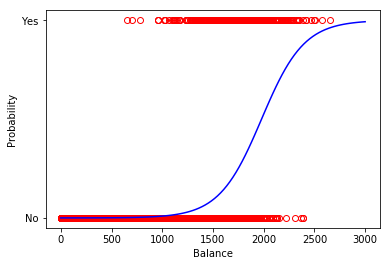

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X, y, 'or', mfc='none');
plt.plot(X_pred, y_pred[:,1], '-b');
plt.xlabel('Balance');
plt.ylabel('Probability')

### Quadratic discriminant

More complex to apply the function on the dataset but it might be more accurate

In [60]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Make sure you feed the data in the right shape  
X = info[['balance']]
y = info['default_factorization']
qda = QuadraticDiscriminantAnalysis()
qda.fit(X,y)

X_pred = np.array([1500,2000]).reshape(-1,1)
print(qda.predict_proba(X_pred))

[[ 0.89830669  0.10169331]
 [ 0.47945471  0.52054529]]


### Linear Discrim

X | Y

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Make sure you feed the data in the right shape  
X = info[['balance']]
y = info['default_factorization']
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)
X_pred = np.array([1500, 2000]).reshape(-1,1)
print(lda.predict_proba(X_pred))


[[ 0.9119783   0.0880217 ]
 [ 0.50986471  0.49013529]]


### Logistic Regre

In [62]:
from sklearn.linear_model import LogisticRegression

X = info[['balance']]
y = info['default_factorization']
lr = LogisticRegression()
lr.fit(X,y)
X_pred = np.array([1500, 2000]).reshape(-1,1)
print(lda.predict_proba(X_pred))

[[ 0.9119783   0.0880217 ]
 [ 0.50986471  0.49013529]]
